## Rachel Tekchandani
---
### DATA 4319 : Statisical & Machine Learning

K-Means Clustering: An unsupervised learning algorithm with input of

$$ x = x^1, \ldots ,x^N $$

unlabeled feature vectors with the Goal of grouping the vectors according to similar features.

A definition of clustering could be "the process of organizing objects into groups whose members are similar in some way."  So all "similar" objects would be in the same cluster, according to this interpretation of the term.

This is the goal of all unsupervised learning.

![kmeans](kmeans.png)

Step 0: Initialize $C = C^1, \ldots, C^k$ randomly chosen centroids.

Algorithm:

Step 1 : Calculate the Euclidean distance from each feature vector to each centroid.

Step 2 : Assign to each feature vector the centroid that is closest.  (If $x^{(i)}$ was assigned centroid $c^j$ the current label of $x^{(i)}$ is $j$.

Let $S_i$ be the set of all feature vectors assigned to centroid $C^{(i)}$.

Step 3 : Next update the centroids in $C$ by (Mean along the $j$th dimension for cluster $i$.)

$$C_j^{(i)} = \frac{1}{\lvert S_i \rvert} \sum_{x \in S_i} x_j$$

Step 4 : Once the mean has stopped changing, the cluster has been formed

In [37]:
using Statistics
using Plots
using Random

The code will generate artificial data that will simulate clustered unlabeled data and we assume all points in a cluster will lie in a circle of a given radius

In [38]:
#how to form a circle
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    return h.+r*sin.(θ), k.+r*cos.(θ)
end

circleShape (generic function with 1 method)

In [39]:
# cluster 1 has center (4,5) and radius 1.8
cluster1 = [(4 + (-1)^rand(1:2)*rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

17-element Array{Tuple{Float64,Float64},1}:
 (4.432302071843248, 5.285408150842722)
 (3.728906432642844, 4.229143452514317)
 (4.612010583160263, 4.014091463023157)
 (2.267961976835909, 4.8964481841895084)
 (4.328310619600752, 4.110036725466623)
 (2.839234171760418, 4.780306587156044)
 (3.4402669603809555, 5.691584669526492)
 (4.030283906365358, 5.334164953648172)
 (3.0955200784979775, 4.713339470866558)
 (4.1535835460899415, 5.858220793472763)
 (4.610445550985413, 4.578711767137576)
 (4.16150525496947, 4.235632450908747)
 (2.5997536673186126, 5.976771899421227)
 (5.8188519751843035, 5.479526308941536)
 (4.814331324736362, 5.718191823984146)
 (5.145540816419424, 4.980089501655447)
 (3.1521877887508407, 4.790418499729752)

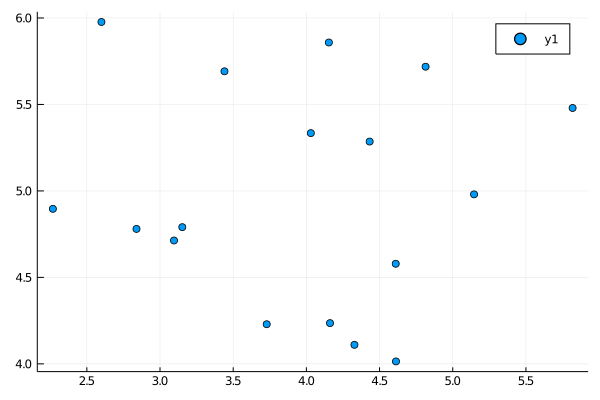

In [40]:
scatter(cluster1)

In [41]:
# cluster 2 has center (9, 7) and radius 2.2
cluster2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

21-element Array{Tuple{Float64,Float64},1}:
 (9.87668612416434, 6.514863173106275)
 (8.881008716453882, 6.9868361650213355)
 (7.845228117842593, 6.106908907740146)
 (9.98801522043635, 6.074852915309674)
 (9.507422477733412, 6.390968052941961)
 (9.533360500077837, 7.757016728745487)
 (7.458551363164789, 6.170520304494774)
 (9.480091771712335, 6.963468865203369)
 (8.417502398993566, 7.119988930996826)
 (9.344696118654536, 7.038593730667745)
 (8.375975572914363, 7.802668510532147)
 (8.59613004234621, 7.754514593176621)
 (8.113698050420085, 7.105029642123137)
 (9.163581470461793, 7.841510626425197)
 (9.685912723758832, 7.689950058543879)
 (8.694430321880677, 6.940815436558653)
 (8.374758883969474, 7.477808529820908)
 (9.05855445525154, 6.360857512622653)
 (9.359139357877112, 6.526549614892261)
 (8.445128358342012, 7.785230406560322)
 (8.116639398256646, 7.9094773172603485)

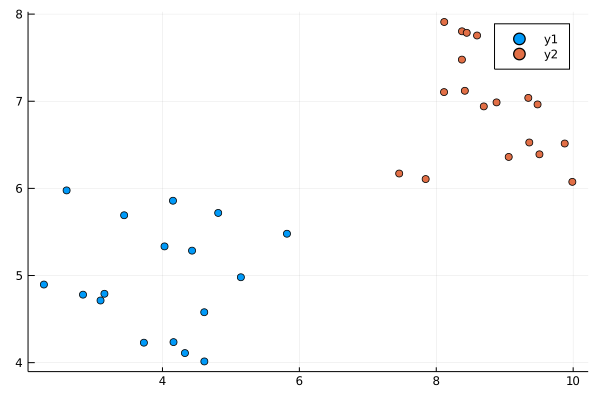

In [42]:
scatter!(cluster2)

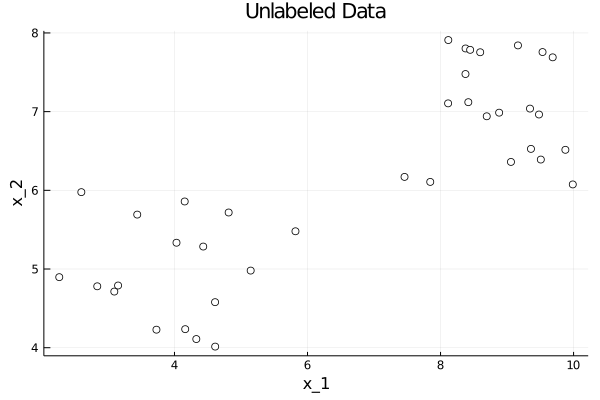

In [43]:
# Create a new dataset with a combination of the two clusters
data = vcat(cluster1, cluster2)

plot(legend = false, xlabel="x_1", ylabel="x_2", title="Unlabeled Data")
scatter!(data, color = "white")

Plot circles enclosing the data points using known values.  The goal of K-Means is to recreate this with unlabeled and unknown data.

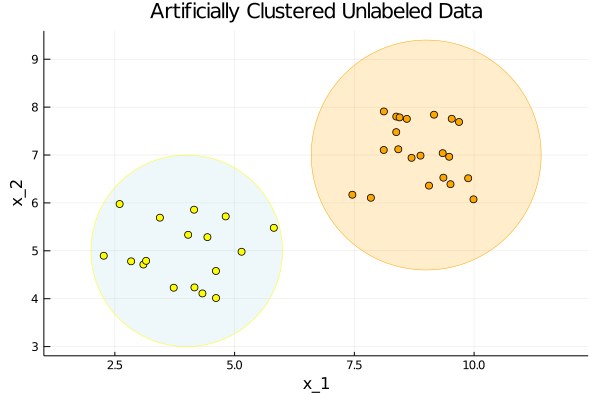

In [44]:
plot(legend = false,
    xlabel = "x_1",
    ylabel = "x_2",
    title = "Artificially Clustered Unlabeled Data")

plot!(circleShape(4, 5, 2.0),
      seriestype = [:shape, ],
      lw = 0.5,
      c = "lightblue",
      linecolor = "yellow",
      legend = false,
      fillalpha = 0.2,
      aspect_ratio = 1,)

plot!(circleShape(9, 7, 2.4),
      seriestype = [:shape, ],
      lw = 0.5,
      c = "orange",
      linecolor = "orange",
      legend = false,
      fillalpha = 0.2,
      aspect_ratio = 1,)

scatter!(cluster1,
         color = "yellow",
         legend = false)

scatter!(cluster2,
         color = "orange",
         legend = false)

In [45]:
circleShape(4, 5, 2.0)

([4.0, 4.025182441996913, 4.050360891440277, 4.075531356409542, 4.100689846250058, 4.125832372205772, 4.150954948051631, 4.17605359072557, 4.201124320960016, 4.226163163912774  …  3.7738368360872254, 3.798875679039984, 3.8239464092744284, 3.8490450519483685, 3.8741676277942276, 3.8993101537499415, 3.9244686435904574, 3.949639108559723, 3.974817558003086, 3.9999999999999996], [7.0, 6.999841454869628, 6.999365844615072, 6.998573244642021, 6.997463780613341, 6.996037628429151, 6.994295014198935, 6.992236214205693, 6.98986155486214, 6.987171412658949  …  6.987171412658949, 6.98986155486214, 6.992236214205693, 6.994295014198935, 6.996037628429151, 6.997463780613341, 6.998573244642021, 6.999365844615072, 6.999841454869628, 7.0])

---
A function to calculate the Euclidean distance is needed using the formula:

$$ d(p,q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $$

---

In [46]:
#Euclidean distance function

function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

---
Let $X$ denote the collection of unlabeled data, and $C = c^1, \ldots , c^k$ denote the collection of $K$ centroid $c^i$ for $i = 1, \ldots , K$. At each iteration of the $K$ - means algorithm we need to calculate the distance from each point in X to each centroid $c^i$, for $i = 1, \ldots, K$.  

---

In [47]:
function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

---

Let $X$ denote the collection of unlabeled data, and $C = c^1, \ldots , c^k$ denote the collection of $K$ centroids $c^i$ for $i = 1, \ldots, K$.  At each iteration of the $K$ - means algorithm we need to calculate the distance from each point in $X$ to each centroid $c^i$, for $i = 1, \ldots , K$.  

---

In [48]:
function k_means_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

k_means_distances (generic function with 1 method)

---

After calculating the distance to each centroid, the $K$ means algorith then assigns each data point in $X$ to a centroid.  This assignment is done according to:

$$\text{argmix} d(c^i, x), c^i \in C $$

---

In [50]:
function k_means_clusters(X, centroids, k)
    distances = k_means_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
            end
        end
    end
    return clusters
end  

k_means_clusters (generic function with 1 method)

In [51]:
function k_means_new_centroids(X, centroids, k)
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(new_centers, point)
    end
    return new_centers
end

k_means_new_centroids (generic function with 1 method)

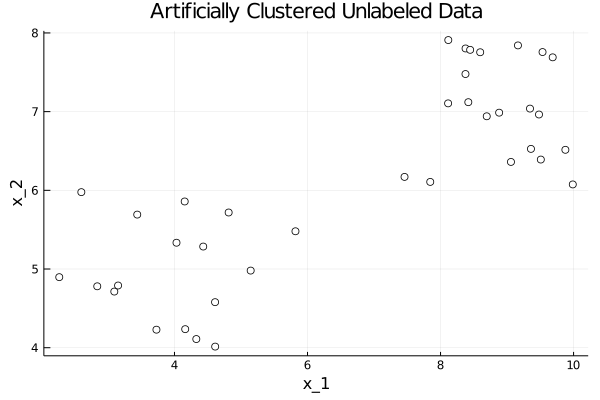

In [52]:
plot(legend = false,
     xlabel = "x_1",
     ylabel = "x_2",
     title  = "Artificially Clustered Unlabeled Data")
scatter!(cluster1, color = "white", legend=false)
scatter!(cluster2, color = "white", legend = false)

In [53]:
# Taking K=2, initialize 2 centroids

initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]

initial_centroids

2-element Array{Tuple{Int64,Int64},1}:
 (5, 10)
 (4, 7)

In [54]:
clusters = k_means_clusters(data, initial_centroids, 2)
clusters

Dict{Any,Any} with 38 entries:
  (9.68591, 7.68995) => 1
  (4.16151, 4.23563) => 2
  (2.83923, 4.78031) => 2
  (8.37598, 7.80267) => 1
  (4.32831, 4.11004) => 2
  (4.81433, 5.71819) => 2
  (4.61201, 4.01409) => 2
  (8.11664, 7.90948) => 1
  (9.48009, 6.96347) => 1
  (3.15219, 4.79042) => 2
  (8.4175, 7.11999)  => 2
  (9.50742, 6.39097) => 2
  (3.44027, 5.69158) => 2
  (2.26796, 4.89645) => 2
  (4.03028, 5.33416) => 2
  (8.37476, 7.47781) => 1
  (3.72891, 4.22914) => 2
  (9.98802, 6.07485) => 2
  (9.35914, 6.52655) => 2
  (9.16358, 7.84151) => 1
  (4.4323, 5.28541)  => 2
  (8.88101, 6.98684) => 2
  (4.61045, 4.57871) => 2
  (9.53336, 7.75702) => 1
  (8.69443, 6.94082) => 2
  ⋮                  => ⋮

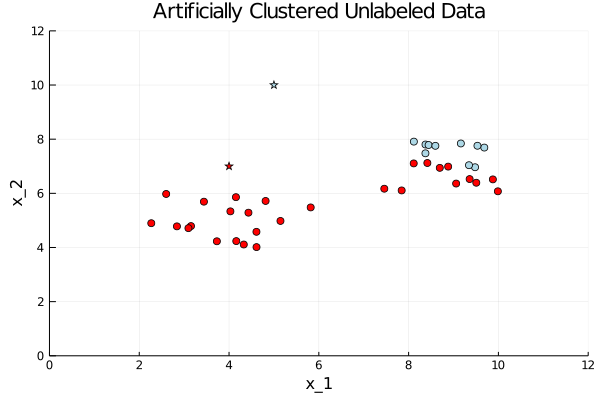

In [55]:
plot(legend = false,
     xlabel = "x_1",
     xlim = (0,12),
     ylabel = "x_2",
     ylim = (0,12),
     title  = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
         legend = false, 
         color = "lightblue")

scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color  = "red"
)

scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)

In [56]:
# update the centroids using the k_means_new_centroids

centroids_test = k_means_new_centroids(data, initial_centroids, 2)
centroids_test

2-element Array{Any,1}:
 (8.911627484049406, 7.602023936693601)
 (5.872544047491445, 5.606081334224732)

In [57]:
# create new clusters using the updated centroids
clusters = k_means_clusters(data, centroids_test, 2)
clusters

Dict{Any,Any} with 38 entries:
  (9.68591, 7.68995) => 1
  (4.16151, 4.23563) => 2
  (2.83923, 4.78031) => 2
  (8.37598, 7.80267) => 1
  (4.32831, 4.11004) => 2
  (4.81433, 5.71819) => 2
  (4.61201, 4.01409) => 2
  (8.11664, 7.90948) => 1
  (9.48009, 6.96347) => 1
  (3.15219, 4.79042) => 2
  (8.4175, 7.11999)  => 1
  (9.50742, 6.39097) => 1
  (3.44027, 5.69158) => 2
  (2.26796, 4.89645) => 2
  (4.03028, 5.33416) => 2
  (8.37476, 7.47781) => 1
  (3.72891, 4.22914) => 2
  (9.98802, 6.07485) => 1
  (9.35914, 6.52655) => 1
  (9.16358, 7.84151) => 1
  (4.4323, 5.28541)  => 2
  (8.88101, 6.98684) => 1
  (4.61045, 4.57871) => 2
  (9.53336, 7.75702) => 1
  (8.69443, 6.94082) => 1
  ⋮                  => ⋮

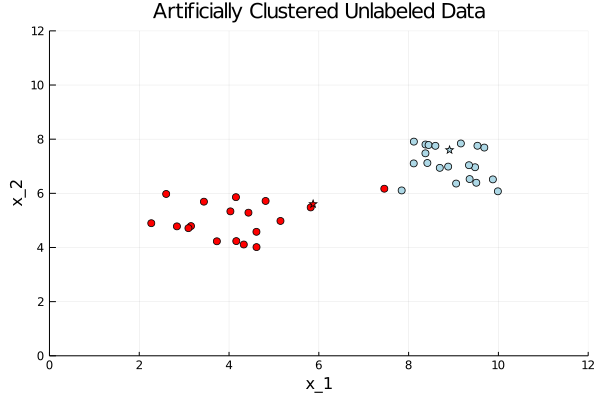

In [58]:
plot(legend = false,
     xlabel = "x_1",
     xlim = (0,12),
     ylabel = "x_2",
     ylim = (0,12),
     title  = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
         legend = false, 
         color = "lightblue")

scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color  = "red"
)

scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "red", shape = :star5)

---

It can be seen that after one iteration, the data has been clustered by moving the centroid to the mean of the data.

Repeat another iteration and inspect the movement of the centroid

---

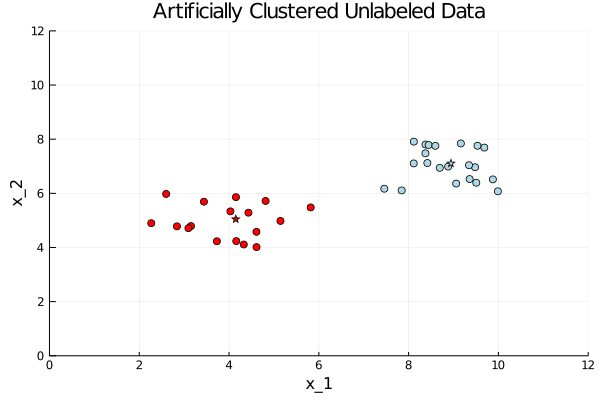

In [59]:
centroids_test = k_means_new_centroids(data, centroids_test, 2)

clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0,12),
     ylabel = "x_2",
     ylim = (0,12),
     title  = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
         legend = false, 
         color = "lightblue")

scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color  = "red"
)

scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "red", shape = :star5)

---
Repeat with K=3, so initilize with 3 random centroids

---

[(2, 3), (5, 2), (8, 8)]


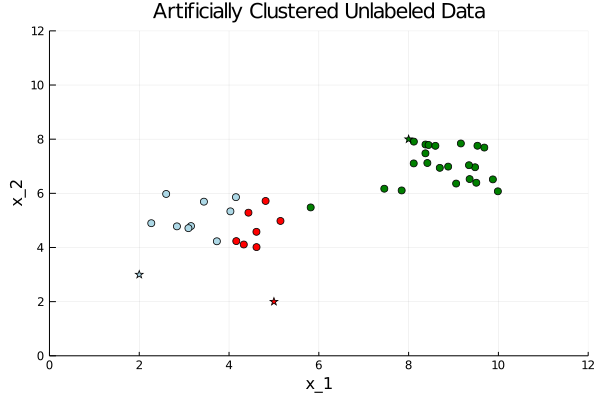

In [60]:
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]

println(initial_centroids)

clusters = k_means_clusters(data, initial_centroids, 3)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0,12),
     ylabel = "x_2",
     ylim = (0,12),
     title  = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
         legend = false, 
         color = "lightblue")

scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color  = "red")

scatter!([x for x in keys(clusters) if clusters[x] == 3],
         legend = false,
         color = "green")

scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)
scatter!([initial_centroids[3]], color = "green", shape = :star5)

setup algorithm with stopping criteria
criteria: 
           1) Centroids of newly formed clusters do not change
           2) Points remain in the same cluster
           3) Maximum number of iterations are reached

In [61]:
function k_means_algorithm(X, k, ϵ; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] -j))
    end
    
    # Now for the K-Means algorithm
    new_centroids = k_means_new_centroids(X, centroids, k)
    j = 1
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ && j < 1000000
        centroids, new_centroids = new_centroids, k_means_new_centroids(X, new_centroids, k)
        j += 1
    end
    
    if return_centroids == false
        return k_means_clusters(X, new_centroids, k)
    else
        return new_centroids
    end
end

k_means_algorithm (generic function with 1 method)

In [62]:
#test your function
k_means_algorithm(data, 2, 0.001)

Dict{Any,Any} with 38 entries:
  (9.68591, 7.68995) => 1
  (4.16151, 4.23563) => 2
  (2.83923, 4.78031) => 2
  (8.37598, 7.80267) => 1
  (4.32831, 4.11004) => 2
  (4.81433, 5.71819) => 2
  (4.61201, 4.01409) => 2
  (8.11664, 7.90948) => 1
  (9.48009, 6.96347) => 1
  (3.15219, 4.79042) => 2
  (8.4175, 7.11999)  => 1
  (9.50742, 6.39097) => 1
  (3.44027, 5.69158) => 2
  (2.26796, 4.89645) => 2
  (4.03028, 5.33416) => 2
  (8.37476, 7.47781) => 1
  (3.72891, 4.22914) => 2
  (9.98802, 6.07485) => 1
  (9.35914, 6.52655) => 1
  (9.16358, 7.84151) => 1
  (4.4323, 5.28541)  => 2
  (8.88101, 6.98684) => 1
  (4.61045, 4.57871) => 2
  (9.53336, 7.75702) => 1
  (8.69443, 6.94082) => 1
  ⋮                  => ⋮

In [63]:
k_means_algorithm(data, 2, 0.001, return_centroids = true)

2-element Array{Any,1}:
 (3.9547645132671816, 4.980710982499104)
 (8.87221483070059, 7.062782382035415)

----
The centroids created can be used for prediction or classification

---

In [64]:
function predict(point, X, k, ϵ)
    centroids = k_means_algorithm(X, k, ϵ, return_centroids = true)
    clusters = k_means_algorithm(X, k, ϵ)
    print("Predicted class of point ", string(point), " is ")
    println("Class ", string(clusters[point]))
end

predict (generic function with 1 method)

In [65]:
# test the function
predict(data[1], data, 2, 0.1)

Predicted class of point (4.432302071843248, 5.285408150842722) is Class 2


---
Visualize the clustering circles

---

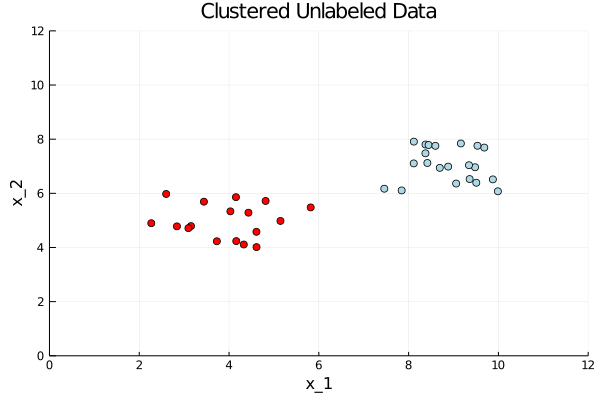

In [66]:
clusters = k_means_algorithm(data, 2, 0.001)

plot(legend = false,
    xlabel  = "x_1",
    xlim    = (0,12),
    ylabel  = "x_2",
    ylim    = (0, 12),
    title   = "Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
           color = "lightblue",
           legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color = "red")

In [67]:
# repeat with 3 

# first cluster has center at (5,10)
cluster1 = [( rand(1:10) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(1:10) + (-1)^rand(1:2)*rand(1:1.5)*rand())
            for _ = 1:19]

cluster2 = [(rand(12:20) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(12:20) + (-1)^rand(1:2)*rand(1:1.5)*rand())
            for _ = 1:15]

cluster3 = [(rand(23:27) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(23:27) + (-1)^rand(1:2)*rand(1:1.5)*rand())
            for _ = 1:21]

cluster1

19-element Array{Tuple{Float64,Float64},1}:
 (5.70079348801553, 9.085510050730116)
 (7.606183046705495, 4.000478972873809)
 (1.9306738959928742, 2.5378980747127025)
 (8.972792886818215, 7.491187226970904)
 (3.7573110851657936, 5.430352162148686)
 (2.327373544703115, 3.8404005248204)
 (6.861135831695732, 5.766429261696903)
 (6.312645330087336, 7.109994949132096)
 (2.966769905086328, 2.7561209648292)
 (5.085634703138634, 7.635099599407777)
 (5.821098802276428, 10.680255367626224)
 (1.1384075105276708, 1.726617759092388)
 (3.123467323048076, 9.087283718542626)
 (9.460509650154352, 9.923962813955859)
 (7.292149480455569, 3.7636854044931334)
 (7.283706770590259, 7.693519213304948)
 (0.47207060876927254, 10.322270618740726)
 (7.440209168841083, 8.938103197358803)
 (8.62076229675993, 0.7462362728515963)

In [68]:
data_new = copy(cluster1)
for x in cluster2
    push!(data_new, x)
end
for x in cluster3
    push!(data_new, x)
end

data_new

55-element Array{Tuple{Float64,Float64},1}:
 (5.70079348801553, 9.085510050730116)
 (7.606183046705495, 4.000478972873809)
 (1.9306738959928742, 2.5378980747127025)
 (8.972792886818215, 7.491187226970904)
 (3.7573110851657936, 5.430352162148686)
 (2.327373544703115, 3.8404005248204)
 (6.861135831695732, 5.766429261696903)
 (6.312645330087336, 7.109994949132096)
 (2.966769905086328, 2.7561209648292)
 (5.085634703138634, 7.635099599407777)
 (5.821098802276428, 10.680255367626224)
 (1.1384075105276708, 1.726617759092388)
 (3.123467323048076, 9.087283718542626)
 ⋮
 (23.806800441383757, 27.128758043905016)
 (25.328628917654672, 25.752511934296866)
 (22.065267558149863, 22.594382231344426)
 (22.403654592963765, 25.870156376701935)
 (24.036882273519154, 26.169684749322414)
 (22.917997652720647, 27.571804484782348)
 (26.621532751584493, 24.293649374325657)
 (27.60617598309114, 25.043196136992528)
 (25.779742301374174, 24.6546249604751)
 (23.508424704198198, 26.192147624938265)
 (25.63268175837

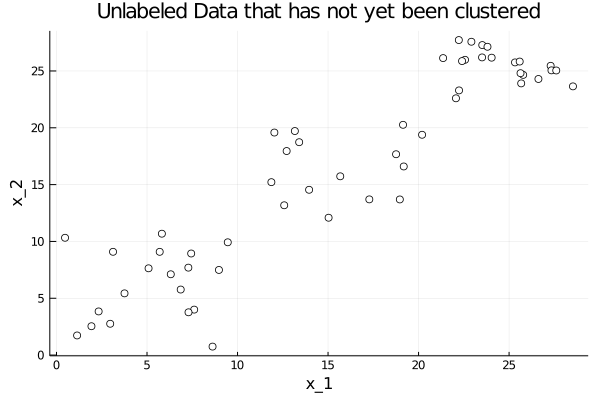

In [69]:
plot(legend = false,
    xlabel = "x_1",
    ylabel = "x_2",
    title = "Unlabeled Data that has not yet been clustered")

scatter!(data_new, color="white")

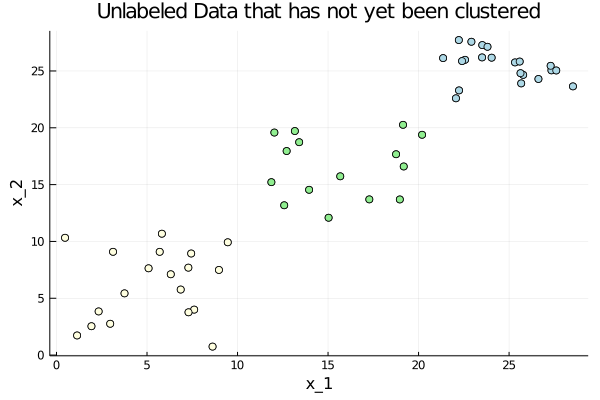

In [70]:
clusters = k_means_algorithm(data_new, 3, 0.0001)
scatter!([x for x in keys(clusters) if clusters[x] == 1],
         color = "lightyellow",
         legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color = "lightblue")
scatter!([x for x in keys(clusters) if clusters[x] == 3],
         legend = false,
         color = "lightgreen")

---
This notebook shows that the method of K-means clustering can give structure to unstructured data by finding points that are close in distance and so should be related in some way.

The demonstration below uses the clustering algorithm on the Iris dataset and appears to seperate the different species when there are 2 but not so well when there are 3.

---

In [71]:
using RDatasets
iris = dataset("datasets", "iris"); # load the data
iris = dataset("datasets","iris") 
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]  

100-element Array{Tuple{Float64,Float64},1}:
 (5.1, 3.5)
 (4.9, 3.0)
 (4.7, 3.2)
 (4.6, 3.1)
 (5.0, 3.6)
 (5.4, 3.9)
 (4.6, 3.4)
 (5.0, 3.4)
 (4.4, 2.9)
 (4.9, 3.1)
 (5.4, 3.7)
 (4.8, 3.4)
 (4.8, 3.0)
 ⋮
 (5.6, 3.0)
 (5.5, 2.5)
 (5.5, 2.6)
 (6.1, 3.0)
 (5.8, 2.6)
 (5.0, 2.3)
 (5.6, 2.7)
 (5.7, 3.0)
 (5.7, 2.9)
 (6.2, 2.9)
 (5.1, 2.5)
 (5.7, 2.8)

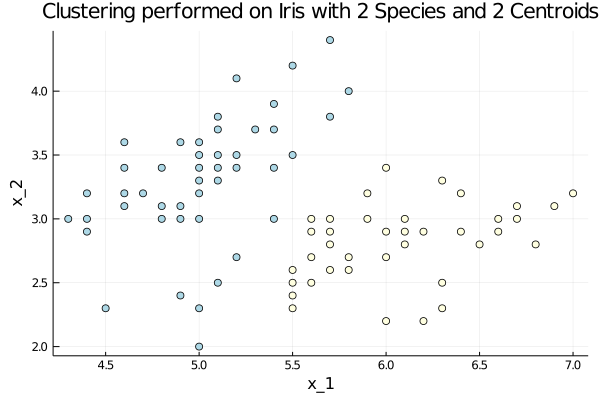

In [72]:
clusters = k_means_algorithm(x_data, 2, 0.0001)

plot(legend = false,
    xlabel = "x_1",
    ylabel = "x_2",
    title = "Clustering performed on Iris with 2 Species and 2 Centroids")
scatter!([x for x in keys(clusters) if clusters[x] == 1],
         color = "lightyellow",
         legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color = "lightblue")
scatter!([x for x in keys(clusters) if clusters[x] == 3],
         legend = false,
         color = "lightgreen")

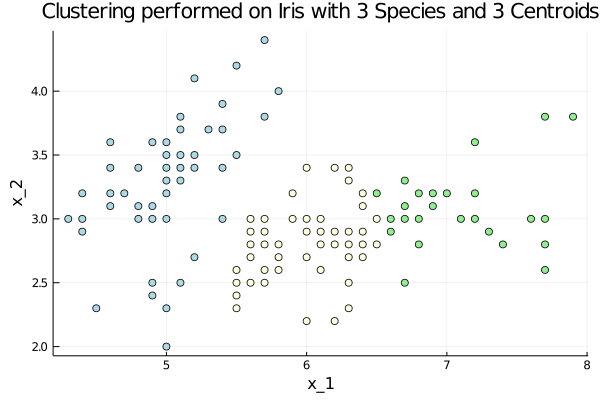

In [74]:
x_data = [x for x in zip(iris.SepalLength[1:150], iris.SepalWidth[1:150])]  


clusters = k_means_algorithm(x_data, 3, 0.0001)

plot(legend = false,
    xlabel = "x_1",
    ylabel = "x_2",
    title = "Clustering performed on Iris with 3 Species and 3 Centroids")
scatter!([x for x in keys(clusters) if clusters[x] == 1],
         color = "lightyellow",
         legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2],
         legend = false,
         color = "lightblue")
scatter!([x for x in keys(clusters) if clusters[x] == 3],
         legend = false,
         color = "lightgreen")